# Project: Wrangling and Analyze Data

In [1]:
import requests
import os
import pandas as pd
import glob
from bs4 import BeautifulSoup as bs
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

## Data Gathering
In the cell below, we'll gather all three pieces of data for this project and load them in the notebook. 
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
df_archive = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
#img_folder_name = 'image_predictions'
#if not os.path.exists(img_folder_name):
    #os.makedirs(img_folder_name)
    
img_predictions_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
img_predictions_response = requests.get(img_predictions_url)
with open(img_predictions_url.split('/')[-1],mode='wb') as file:
    file.write(img_predictions_response.content)

    
df_predictions = pd.read_csv(img_predictions_url.split('/')[-1], sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [4]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

In [5]:
#Create an empty list to append the data to
data_list = []

#for each entry in the tweet_json.txt file, append the data to data_list
with open('tweet_json.txt', encoding='utf-8') as file:
    for line in file:
        data_list.append(json.loads(line))

In [6]:
#use pd.DataFrame to convert our list of dictionaries to a dataframe named df_additional_data
df_additional_data = pd.DataFrame(data_list)

#check that everything worked fine, get a preview of our new dataframe with head()
df_additional_data.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,None,...,False,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,None,...,False,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,None,None,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,None,...,False,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,None,None,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,None,...,False,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,None,None,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,None,...,False,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


## Assessing Data

I'm going to tackle the assessment of our data by first visually examining it, followed by a programmatic assessment. Each assessment will have small notes being taken along the way before deciding on which quality issues and tidiness issues I want to focus on.

#### Visual assessment

For starters, I'm going to change the maximum column width and displayed columns so that pandas cutting off certain text doesn't impede the assessment process.

In [7]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

consumer_key = #redacted
consumer_secret = #redacted
access_token = #redacted
access_secret = #redacted

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [8]:
#use pandas' set_option to change the maximum column width
pd.set_option('display.max_colwidth', -1)

#also change maximum displayed columns
pd.set_option('display.max_columns', None)

In [9]:
tweet_id_list = [df_archive[['tweet_id']]]

In [10]:
#start by visually assessing the dataframe made from the enhanced archive
df_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

A few things I noticed:

* There are a few ratings that don't follow the normal trend of giving a rating with a numerator greater than 10 and a denominator of 10.  The tweet text suggest some of these are errors produced by how the data was programatically recorded, or that the tweet does not actually feature a dog.
* Some names are clearly not names, or are missing entirely
* Dog "stages" are all their own column, and would probably be better off as a single column.  This combined with the distinction between the different stages being pretty loose, it's likely that there are some rows where the dog has been described as multiple stages.  We'll tackle this later when we programmatically assess this dataframe.
* Some tweets are retweets, which could result in duplicate data if it were used
* Some tweets are replies, which could result in duplicate data if it were used


In [11]:
#next, visually assess the image predictions dataframe
df_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


A quick look at the image predictions dataframe has revealed that:

* Many images have low confidence percentages for even the top 3 suggestions
* Naming conventions are inconsistent (some breeds are capitalized while others aren't)
* Some images are actually video thumbnails.  For analysis purposes, I would like to only include images that were originally submitted as an image, so I'll be excluding the rows that use a video thumbnail later.


In [12]:
df_predictions = df_predictions[df_predictions['jpg_url'].str.contains('video_thumb') != True]

In [13]:
df_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [14]:
#lastly, visually assess the additional data dataframe
df_additional_data

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,lang,place,possibly_sensitive,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}",39467,False,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,None,892420643555336193,892420643555336193,None,NaN,None,NaN,None,False,en,None,False,False,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_rates', 'location': 'DM YOUR DOGS, WE WILL RATE', 'description': '#1 Source for Professional Dog Ratings | STORE: @ShopWeRateDogs | IG, FB & SC: WeRateDogs MOBILE APP: @GoodDogsGame | Business: dogratingtwitter@gmail.com', 'url': 'https://t.co/N7sNNHAEXS', 'entities': {'url': {'urls': [{'url': 'https://t.co/N7sNNHAEXS', 'expanded_url': 'http://weratedogs.com', 'display_url': 'weratedogs.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 3200889, 'friends_count': 104, 'listed_count': 2784, 'created_at': 'Sun Nov 15 21:41:29 +0000 2015', 'favourites_count': 114031, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 5288, 'lang': 'en', 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': '000000', 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_tile': False, 'profile_image_url': 'http://pbs.twimg.com/profile_images/861415328504569856/R2xOOfwe_normal.jpg', 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/861415328504569856/R2xOOfwe_normal.jpg', 'profile_banner_url': 'https://pbs.twimg.com/profile_banners/4196983835/1501129017', 'profile_link_color': 'F5ABB5', 'profile_sidebar_border_color': '000000', 'profile_sidebar_fill_color': '000000', 'profile_text_color': '000000', 'profile_use_background_image': False, 'has_extended_profile': True, 'default_profile': False, 'default_profile_image': False, 'following': True, 'follow_request_sent': False, 'notifications': False, 'translator_type': 'none'}"
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]",

This dataframe has several columns whose differences and intricacies aren't immediately clear:
* in_reply_to_*  (screen_name, status_id, status_id_str, user_id, user_id_str)
* is_quote_status, quoted_status, quoted_status_id, quoted_status_id_str
* retweeted, retweeted_status

These columns will be examined more closely in the programatic assessment so we can decide how to clean the dataframe in the following section.





We'll now proceed to programatically assess the dataframes for a deeper look at their structures and statistics.

#### Programatic assessment 

In [15]:
# View more information on the structure of the dataframe df_archive using .info()
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

Based off the number of entries, we can assume that where in_reply_to_status_id is null, in_reply_to_user_id is also null, as well as where retweeted_status_id is null, so is the corresponding retweeted user_id and timestamp. This means that later, we'll have to reduce this dataframe to exclude the rows where these columns are NOT null, since that would indicate a retweet or a reply, and when we do, we only have to focus on one column from each of these types.

In [16]:
# View statistics on the values of df_archive using describe() 
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


Describe() reveals that rating_numerator's maximum is 1776, almost 40 standard deviations away from the mean value of 13.13! Not only that, the mean 13.13 is higher than 75% of all of rating_numerator's entries. Given that 25% or less of the rating_numerator values are less than 10, we may want to investigate ratings lower than 10 as well. rating_denominator also has an unusually high maximum value of 170.  Both numerator and denominator values also have a minimum of 0. We'll be exploring this more below, before we decide what exactly to clean.

Since we're possibly working with a lot of tweets, and I mainly want to handle the outliers that may have a large impact on the accuracy of our aggregates and analyses, we'll establish a "threshold" value.  We can explore percentiles using quantile() on both rating_numerator and rating_denominator.  Based off our findings in the cells below, I'll decide how to further investigate the upper bounds of rating_numerator.

In [17]:
# we'll grab some percentiles using quantile().  We'll check for 95, 96, 97, 98, and 99 percentiles for rating_numerator
print("95%: " + str(df_archive['rating_numerator'].quantile(.95)))
print("96%: " + str(df_archive['rating_numerator'].quantile(.96)))
print("97%: " + str(df_archive['rating_numerator'].quantile(.97)))
print("98%: " + str(df_archive['rating_numerator'].quantile(.98)))
print("99%: " + str(df_archive['rating_numerator'].quantile(.99)))

95%: 13.0
96%: 13.0
97%: 14.0
98%: 14.0
99%: 21.799999999999272


Our outliers seem to lie beyond a numerator score of 14, so we'll be taking a closer look at entries with a numerator_score higher than 14. From there, we will organize the rows into 3 categories:
* data entry error (fixable): The rating_numerator was simply recorded wrong, and we can correct the value using the row's index.
* data entry error (unfixable)/invalid: The text indicates that there are multiple dogs, the image is not a dog at all, there is no actual rating, or is clearly a joke made for hyperbole (even by WeRateDogs standards). These will be removed based off of index.  
* legitimate: although higher than 14, the rating matches the tweet's text, and does not suggest irony or hyperbole. These will be left alone.


Retweets, replies and quotes will not be included since they will be removed at the beginning of the data cleaning process anyway.

In [18]:
# show tweet texts where rating_numerator exceeds 14
df_archive[df_archive['rating_numerator']>14][['text','rating_numerator']]

,text,rating_numerator
55,@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,17
188,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,420
189,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",666
285,RT @KibaDva: I collected all the good dogs!! 15/10 @dog_rates #GoodDogs https://t.co/6UCGFczlOI,15
290,@markhoppus 182/10,182
291,@bragg6of8 @Andy_Pace_ we are still looking for the first 15/10,15
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960
340,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24


Below are the list of tweets: categorized by whether they can be fixed or not, listed by index, and with brief descriptions:

TO FIX:

* 763 (change to 11.27)
* 1202 (change to 11)

TO REMOVE:

* 433 (multiple dogs)
* 516 (no rating)
* 695 (joke)
* 902 (multiple dogs)
* 979 (joke)
* 1120 (multiple dogs)
* 1228 (multiple dogs)
* 1254 (multiple dogs)
* 1274 (multiple dogs)
* 1351 (multiple dogs)
* 1433 (multiple dogs)
* 1635 (multiple dogs)
* 1712 (multiple dogs)
* 1779 (multiple dogs)
* 1843 (multiple dogs)
* 2074 (joke)

TO LEAVE ALONE: (none)

When the time comes for data cleaning, we will be fixing the rows under the TO FIX list and removing the rows under the TO REMOVE list above. No rows need to be left alone as is, so we can actually simply remove all rows that have a rating numerator surpassing 14 when it comes time to clean.

Since we know that only 25% or less tweets feature a rating below 10, according to df_archive.info(), and the twitter account historically gives almost all serious, normal dog photos a rating numerator of 10 or over 10, we'll take a peek at the text of 20 sample tweets where a rating numerator less than 10 was given.

In [19]:
# show tweet texts where rating_numerator is below 10
df_archive[df_archive['rating_numerator']<10][['text', 'rating_numerator']].sample(20)

,text,rating_numerator
2066,This is a Helvetica Listerine named Rufus. This time Rufus will be ready for the UPS guy. He'll never expect it 9/10 https://t.co/34OhVhMkVr,9
1610,"For the last time, WE. DO. NOT. RATE. BULBASAUR. We only rate dogs. Please only send dogs. Thank you ...9/10 https://t.co/GboDG8WhJG",9
2323,Here we have an Austrian Pulitzer. Collectors edition. Levitates (?). 7/10 would garden with https://t.co/NMQq6HIglK,7
966,This is Zoe. She was trying to stealthily take a picture of you but you just noticed. 9/10 not so sneaky pupper https://t.co/FfH3o88Vta,9
1546,Say hello to Chipson. He's aerodynamic af. No eyes (devastating). 9/10 would make sure he didn't bump into stuff https://t.co/V62rIva61J,9
1469,This is Lola. She realized mid hug that she's not ready for a committed relationship with a teddy bear. 9/10 https://t.co/pVebzwRioD,9
2139,Awesome dog here. Not sure where it is tho. Spectacular camouflage. Enjoys leaves. Not very soft. 5/10 still petable https://t.co/rOTOteKx4q,5
45,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5
1065,Here we are witnessing the touchdown of a pupnado. It's not funny it's actually very deadly. 9/10 might still pet https://t.co/CmLoKMbOHv,9
1793,Meet Humphrey. He's a Northern Polyp Viagra. One ear works. Face stuck like that. Always surprised. 9/10 petable af https://t.co/FS7eJQM2F4,9


It seems like most of these are either clearly not dogs, or the twitter account is poking fun at something unrelated to the dog (the background, their attire, other animals present, etc) before giving a below 10/10 score.  For the purpose of having mostly good, normal, candid photos with a rating more in-line with WeRateDog's usual content, we'll remove rows where the rating_numerator is below 10 when it comes times to clean.

Next, we'll look at some percentile stats for the rating denominators.

In [20]:
# we'll grab some percentiles using quantile().  We'll check for 95, 96, 97, 98, and 99 percentiles for rating_denominator
print("95%: " + str(df_archive['rating_denominator'].quantile(.95)))
print("96%: " + str(df_archive['rating_denominator'].quantile(.96)))
print("97%: " + str(df_archive['rating_denominator'].quantile(.97)))
print("98%: " + str(df_archive['rating_denominator'].quantile(.98)))
print("99%: " + str(df_archive['rating_denominator'].quantile(.99)))

95%: 10.0
96%: 10.0
97%: 10.0
98%: 10.0
99%: 10.0


Only 1% (or less) of the rating_denominator values are higher than 10.  This is pretty clear-cut: we'll take a look now at the tweets' text and rating where the column rating_denominator has a value higher than 10:

In [21]:
# show tweet texts where the rating_denominator is more than 10
df_archive[df_archive['rating_denominator']>10][['text','rating_denominator']]

,text,rating_denominator
342,@docmisterio account started on 11/15/15,15
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,70
784,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",11
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,150
1068,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",11
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,170
1165,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,20
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50
1228,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,90
1254,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80


Similarly to what we've done for the numerator, we'll make several lists of rows that can be fixed, cannot be fixed, and should be left alone.  This will exclude retweets and replies again.

TO FIX:
* 1202 (change to 10)
* 1662 (change to 10)


TO REMOVE:
* 433 (multiple dogs)
* 902 (multiple dogs)
* 1068 (re-post)
* 1120 (multiple dogs)
* 1228 (multiple dogs)
* 1254 (multiple dogs)
* 1274 (multiple dogs)
* 1351 (multiple dogs)
* 1433 (multiple dogs)
* 1598 (multiple dogs)
* 1635 (multiple dogs)
* 1779 (multiple dogs)
* 1843 (multiple dogs)

TO LEAVE ALONE: (none)

Only a few need to be changed, and none need to be left alone, so much like before, after fixing the rows matching the indices in the TO FIX list, we'll be dropping all rows that have a rating denominator exceeding 10.

Next, we'll take a closer look at rows with a rating_denominator value below 10:

In [22]:
# show tweet texts where the rating_denominator is less than 10
df_archive[df_archive['rating_denominator']<10][['text','rating_denominator']]

,text,rating_denominator
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",0
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,7
2335,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,2


None of these are worth keeping. Although the tweet at row index 2335 has its rating entered incorrectly, correcting its rating to 9/10 would be pointless since we are removing all entries with a rating_numerator value of less than 10. Therefore, we'll be removing all rows where the rating_denominator value falls below 10 when it comes time for data cleaning.

As mentioned before, the dog "stages" should be one column. However, before committing to something like that, let's examine the doggo, floofer, pupper, and puppo columns as is.

In [23]:
# check how many dogs are labeled doggo, floofer, pupper, puppo
print(str(df_archive['doggo'].value_counts()) + "\n")
print(str(df_archive['floofer'].value_counts()) + "\n")
print(str(df_archive['pupper'].value_counts()) + "\n")
print(str(df_archive['puppo'].value_counts()) + "\n")

None     2259
doggo    97  
Name: doggo, dtype: int64

None       2346
floofer    10  
Name: floofer, dtype: int64

None      2099
pupper    257 
Name: pupper, dtype: int64

None     2326
puppo    30  
Name: puppo, dtype: int64



There definitely isn't an even spread in this data, but that doesn't mean it's not useable for analysis. Before we combine the columns, however, we'll check to be sure that there aren't any rows that contain multiple dog stages. If there are, we will investigate further before deciding how we will clean the data.

In [24]:
# check which rows have more than one stage, and return the indices in a list.
multiple_dog_stages_index_list = []
for index, row in df_archive.iterrows():
    stages = 0
    if row['doggo'] == 'doggo':
        stages += 1
    if row['floofer'] == 'floofer':
        stages += 1
    if row['pupper'] == 'pupper':
        stages += 1
    if row['puppo'] == 'puppo':
        stages += 1
    if stages > 1:
        multiple_dog_stages_index_list.append(index)
        
# print the list of indices that need to be looked at individually
print(multiple_dog_stages_index_list)

[191, 200, 460, 531, 565, 575, 705, 733, 778, 822, 889, 956, 1063, 1113]


Now that we have our list of indices, we'll go through the text associated with each index and determine which dog stage that row should be labeled as.

In [25]:
df_archive[['text','doggo','floofer','pupper','puppo']].loc[multiple_dog_stages_index_list]

,text,doggo,floofer,pupper,puppo
191,Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,doggo,None,None,puppo
200,"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",doggo,floofer,None,None
460,"This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",doggo,None,pupper,None
531,Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,doggo,None,pupper,None
565,"Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze",doggo,None,pupper,None
575,This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,doggo,None,pupper,None
705,This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd,doggo,None,pupper,None
733,"Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u",doggo,None,pupper,None
778,"RT @dog_rates: Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda",doggo,None,pupper,None
822,RT @dog_rates: This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,doggo,None,pupper,None


The verdicts are as listed below:
TO FIX:
* 191 (puppo)
* 460 (pupper)
* 575 (pupper)

TO REMOVE:
* 200 (not a dog)
* 531 (not a dog)
* 565 (multiple dogs)
* 705 (not a dog)
* 733 (multiple dogs)
* 788 (multiple dogs)
* 822 (multiple dogs
* 889 (multiple dogs)
* 956 (not a dog)
* 1063 (multiple dogs)
* 1113 (multiple dogs)

Some of these may be removed by the time we get to cleaning this aspect of the data, so the above steps will be repeated when it comes time for cleaning.

In [26]:
# to finish off df_archive, we can also quickly check if there are any duplicated tweet_id's
df_archive.tweet_id.duplicated().sum()

0

To summarize our findings from df_archive and what needs to be done for cleaning:

* fixing/removing rows where rating_numerator is higher than 14
* removing all rows with a rating_numerator less than 10
* fixing/removing rows where rating_denominator is higher than 10
* removing all rows where rating_denominator is lower than 10
* some rows with multiple dog stages will need their dog stage column values adjusted, or removed entirely


Next, we'll be taking a closer look at df_predictions

In [27]:
#View more information on the structure of the dataframe df_predictions using .info() and .describe()
df_predictions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1991 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    1991 non-null int64
jpg_url     1991 non-null object
img_num     1991 non-null int64
p1          1991 non-null object
p1_conf     1991 non-null float64
p1_dog      1991 non-null bool
p2          1991 non-null object
p2_conf     1991 non-null float64
p2_dog      1991 non-null bool
p3          1991 non-null object
p3_conf     1991 non-null float64
p3_dog      1991 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 161.4+ KB


In [28]:
df_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,1.991000e+03,1991.000000,1991.000000,1.991000e+03,1.991000e+03
mean,7.374094e+17,1.212456,0.601026,1.337312e-01,5.958331e-02
std,6.778564e+16,0.572015,0.270514,1.008227e-01,5.087039e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.758619e+17,1.000000,0.369509,5.273265e-02,1.544640e-02
50%,7.101532e+17,1.000000,0.600186,1.175080e-01,4.903300e-02
75%,7.928288e+17,1.000000,0.853545,1.948820e-01,9.069145e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [29]:
#check for duplicate tweet_id's
df_predictions.tweet_id.duplicated().sum()

0

The programmatic assessment of df_predictions doesn't display anything obviously problematic to me, but this doesn't include the observation about possible inconsistencies in naming conventions that I mentioned earlier in df_prediction's visual assessment.  

When I combine the datasets, I'll be trimming this dataset to only include one prediction: the highest confidence value that corresponds with an actual dog breed. 

Finally, we'll examine df_additional_data further:

In [30]:
#View more information on the structure of the dataframe df_additional_data using .info() and .describe()
df_additional_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2354 non-null object
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null object
id                               2354 non-null int64
id_str                           2354 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null obj

We'll be wanting to get rid of retweets, replies and quotes, but there are multiple columns that could represent each one, and some are even different datatypes. Unlike df_archive, there's also booleans that may be useful in determining whether the row represents a non-original tweet. To make assessment (and possibly future cleaning) easier, we'll make a temporary dataframe that only includes the columns of interest:

* if the tweet was a retweet: retweeted, retweeted_status 
* if the tweet was as quote: quoted_status, quoted_status_id, quoted_status_id_str, is_quote_status
* if the tweet was a reply: in_reply_to_.... (screen_name, status_id, status_id_str, user_id, user_id_str)


In [31]:
# make the temporary df
df_temp = df_additional_data[[
    'retweeted','retweeted_status',
    'quoted_status','quoted_status_id','quoted_status_id_str','is_quote_status',
    'in_reply_to_screen_name','in_reply_to_status_id','in_reply_to_status_id_str','in_reply_to_user_id','in_reply_to_user_id_str'
]]

df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 11 columns):
retweeted                    2354 non-null bool
retweeted_status             179 non-null object
quoted_status                28 non-null object
quoted_status_id             29 non-null float64
quoted_status_id_str         29 non-null object
is_quote_status              2354 non-null bool
in_reply_to_screen_name      78 non-null object
in_reply_to_status_id        78 non-null float64
in_reply_to_status_id_str    78 non-null object
in_reply_to_user_id          78 non-null float64
in_reply_to_user_id_str      78 non-null object
dtypes: bool(2), float64(3), object(6)
memory usage: 170.2+ KB


Now that we have our temporary dataframe, a few things to investigate:

* is_quote_status and retweeted are both booleans
* there is no respective boolean for replies
* quoted_status has a different number of non-null values than quoted_status_id/quoted_status_id_str

We'll take a closer look at the is_quote_status and retweeted columns first:

In [32]:
# print the number of True and False values for is_quote_status and retweeted, in an easily readable manner

print("is_quote_status: ")
print(df_temp['is_quote_status'].value_counts())
print("\nretweeted:")
print(df_temp['retweeted'].value_counts())

is_quote_status: 
False    2323
True     31  
Name: is_quote_status, dtype: int64

retweeted:
False    2354
Name: retweeted, dtype: int64


We see here that that are 31 rows where is_quote_status is recorded as "True," despite only 28 having an entry for quoted_status and 29 having an entry for quoted_status_id/quoted_status_id_str. Not only that, but NONE of the entries have "True" under the retweeted column, even though the retweeted_status column has 179 non-null entries. 

This means that quoted_status and quoted_status_id may not fully represent all rows that are actually quotes, and the value of retweeted is not going to indicate whether or not the tweet was actually a retweet or not, and we'll have to use a different column when we clean.

To save us some time later, we'll experiment now by:
* removing all rows where retweeted_status is non-null
* removing all rows where is_quote_status is True
* removing all rows where in_reply_to_screen_name is non-null

Theoretically, this should result in our temporary dataframe where the only columns with a non-zero amount of non-null entries are the booleans: retweeted and is_quote_status.  This would indicate a dataframe with ONLY original tweets.

In [33]:
# remove all rows where retweeted_status is non-null
df_temp = df_temp[df_temp['retweeted_status'].isnull() == True]

# remove all rows where is_quote_status is True
df_temp = df_temp[df_temp['is_quote_status'] == False]

# remove all rows where in_reply_to_status_id is non-null
df_temp = df_temp[df_temp['in_reply_to_status_id'].isnull() == True]

# the cell below should have only non-nulls in retweeted, is_quote_status
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2068 entries, 0 to 2353
Data columns (total 11 columns):
retweeted                    2068 non-null bool
retweeted_status             0 non-null object
quoted_status                0 non-null object
quoted_status_id             0 non-null float64
quoted_status_id_str         0 non-null object
is_quote_status              2068 non-null bool
in_reply_to_screen_name      0 non-null object
in_reply_to_status_id        0 non-null float64
in_reply_to_status_id_str    0 non-null object
in_reply_to_user_id          0 non-null float64
in_reply_to_user_id_str      0 non-null object
dtypes: bool(2), float64(3), object(6)
memory usage: 165.6+ KB


We have confirmed that:
* the in_reply_to_* columns all share the same rows where non-null values are recorded
* culling the rows where is_quote_status is True also successfully removes the rows where quoted_status and quoted_status_id/quoted_status_id_str are non-null
* to remove retweets, we must use the retweeted_status column rather than the retweeted column

We'll be repeating the steps performed above when it comes time for data cleaning. For now, we'll continue with our programmatic assessment below.

In [34]:
# View statistics using describe()
df_additional_data.describe()

,favorite_count,id,in_reply_to_status_id,in_reply_to_user_id,quoted_status_id,retweet_count
count,2354.000000,2.354000e+03,7.800000e+01,7.800000e+01,2.900000e+01,2354.000000
mean,8080.968564,7.426978e+17,7.455079e+17,2.014171e+16,8.162686e+17,3164.797366
std,11814.771334,6.852812e+16,7.582492e+16,1.252797e+17,6.164161e+16,5284.770364
min,0.000000,6.660209e+17,6.658147e+17,1.185634e+07,6.721083e+17,0.000000
25%,1415.000000,6.783975e+17,6.757419e+17,3.086374e+08,7.888183e+17,624.500000
50%,3603.500000,7.194596e+17,7.038708e+17,4.196984e+09,8.340867e+17,1473.500000
75%,10122.250000,7.993058e+17,8.257804e+17,4.196984e+09,8.664587e+17,3652.000000
max,132810.000000,8.924206e+17,8.862664e+17,8.405479e+17,8.860534e+17,79515.000000


In [35]:
#check for duplicates, using both id attributes
print("id column dupes: ")
print(df_additional_data['id'].duplicated().sum())
print("\nid_str column dupes: ")
print(df_additional_data['id_str'].duplicated().sum())

id column dupes: 
0

id_str column dupes: 
0


The minimum favorite and retweet counts is 0, which seems unusual, but may be due to the retweets, replies, and quotes.

We can quickly remake our temporary dataframe to also include favorite_count and retweet_count:

In [36]:
# remake the temporary df, this time including favorite_count and retweet_count and only the columns needed
# to get rid of retweets, quotes, replies.
df_temp = df_additional_data[[
    'favorite_count','retweet_count',
    'retweeted_status','is_quote_status','in_reply_to_status_id'
]]

In [37]:
# remove rows that are retweets, quotes, replies

# remove all rows where retweeted_status is non-null
df_temp = df_temp[df_temp['retweeted_status'].isnull() == True]

# remove all rows where is_quote_status is True
df_temp = df_temp[df_temp['is_quote_status'] == False]

# remove all rows where in_reply_to_status_id is non-null
df_temp = df_temp[df_temp['in_reply_to_status_id'].isnull() == True]

# take another look at the statistics with describe()
df_temp.describe()

,favorite_count,retweet_count,in_reply_to_status_id
count,2068.000000,2068.000000,0.0
mean,8889.795938,2825.891199,NaN
std,12135.207527,4715.330790,NaN
min,81.000000,16.000000,NaN
25%,2044.000000,637.750000,NaN
50%,4156.000000,1390.000000,NaN
75%,11278.750000,3261.000000,NaN
max,132810.000000,79515.000000,NaN


We now see that removing retweets, replies, and quotes addressed our concerns about favorite_count and retweet_count. This aspect will not need to be cleaned.

### Quality issues

1. Retweets and replies need to be removed from df_archive

2. Retweets, replies and quotes need to be removed from df_additional_data

3. Some dog breeds are capitalized and some aren't 

4.	Certain entries need numerator values adjusted

5.	Certain entries need denominator values adjusted

6.	Entries with rating numerators over 14  or below 10 need removal

7.	Entries with rating denominators not equal to 10 need removal

8.	Entries with multiple dog stage values need adjustment or removal

9.	Entries whose images are a video thumbnail need removal


### Tidiness issues
1. Dog "stages" should be one column

2. Predictions from image prediction should just be one prediction, based off the highest confidence percentage that also matches an actual dog breed.

3. For analytical purposes, it would be best to condense the data and have one clear, comprehensive dataframe that includes only the data needed for analysis.

## Cleaning Data
In this section, we'll clean all issues listed above. 

In [38]:
# Make copies of original pieces of data, appending "_clean" to the new dataframes.

df_archive_clean = df_archive.copy()
df_predictions_clean = df_predictions.copy()
df_additional_data_clean = df_additional_data.copy()

### Issue #1: Retweets and replies need to be removed from df_archive_clean

#### Define:
We only want original tweets, since using retweets and replies can "muddy" our data with duplicate or redundant information. We'll start by doing this in our df_archive_clean dataframe by making sure the following are null:

* retweeted_status_id
* in_reply_to_status_id 

We'll then check to be sure that no columns that would suggest retweets or replies have non-zero non-null values.

#### Code

In [39]:
# query for rows that are not a retweet or reply, and save this query to df_archive_clean.
df_archive_clean = df_archive_clean.query(
    'retweeted_status_id == "NaN" &\
    in_reply_to_status_id == "NaN"'
)


#### Test

In [40]:
# the result of this cell should display that retweeted_status_id, in_reply_to_status_id, 
# and their related columns have 0 entries.
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(3), object(10)

### Issue #2: Retweets, replies and quotes need to be removed from df_additional_data_clean

#### Define:
The dataframe df_additional_data_clean not only has retweets and replies, but also has quotes.  We'll be getting rid of all rows that indicate that the data represents any of these 3 things by ensuring the following:
* removing all rows where retweeted_status is non-null (or, only including rows where retweeted_status is null)
* removing all rows where is_quote_status is True (or, only including rows where is_quote_status is False)
* removing all rows where in_reply_to_screen_name is non-null (or, only including rows where this column is null)

We'll then double-check that the newly cleaned dataframe does not have any non-zero amount of non-null values that could indicate rows representing retweets, replies, or quotes.

#### Code

In [41]:
# remove all rows where retweeted_status is non-null
df_additional_data_clean = df_additional_data_clean[
    df_additional_data_clean['retweeted_status'].isnull() == True]

# remove all rows where is_quote_status is True
df_additional_data_clean = df_additional_data_clean[
    df_additional_data_clean['is_quote_status'] == False]

# remove all rows where in_reply_to_status_id is non-null
df_additional_data_clean = df_additional_data_clean[
    df_additional_data_clean['in_reply_to_status_id'].isnull() == True]


#### Test

In [42]:
# this should display 0's for non-boolean columns indicating if the row represents a retweet, reply, or quote.
df_additional_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2068 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2068 non-null object
display_text_range               2068 non-null object
entities                         2068 non-null object
extended_entities                1971 non-null object
favorite_count                   2068 non-null int64
favorited                        2068 non-null bool
full_text                        2068 non-null object
geo                              0 non-null object
id                               2068 non-null int64
id_str                           2068 non-null object
in_reply_to_screen_name          0 non-null object
in_reply_to_status_id            0 non-null float64
in_reply_to_status_id_str        0 non-null object
in_reply_to_user_id              0 non-null float64
in_reply_to_user_id_str          0 non-null object
i

### Issue #3: Some dog breeds are capitalized and some aren't

#### Define

Some dog breeds in the df_predictions dataframe are capitalized, whereas others aren't. To keep things simple, consistent, and easy to query later, we'll go ahead and:
* create a list of the columns to be changed: p1, p2, p3
* iteratively go through df_predictions_clean and lower the values under each of these columns.

#### Code

In [43]:
# create a list for columns p1, p2, p3
column_list = ['p1','p2','p3']

# Use str.lower() to iteratively replace all entries in the respective columns with lowercase letters.
for column in column_list:
    df_predictions_clean[column] = df_predictions_clean[column].str.lower()

#### Test

In [44]:
# We should be able to visually assess from below that the dog breed names are now all lowercase.
df_predictions_clean[['p1','p2','p3']]

,p1,p2,p3
0,welsh_springer_spaniel,collie,shetland_sheepdog
1,redbone,miniature_pinscher,rhodesian_ridgeback
2,german_shepherd,malinois,bloodhound
3,rhodesian_ridgeback,redbone,miniature_pinscher
4,miniature_pinscher,rottweiler,doberman
5,bernese_mountain_dog,english_springer,greater_swiss_mountain_dog
6,box_turtle,mud_turtle,terrapin
7,chow,tibetan_mastiff,fur_coat
8,shopping_cart,shopping_basket,golden_retriever
9,miniature_poodle,komondor,soft-coated_wheaten_terrier


### Issue #4: Certain entries need rating numerator values adjusted

#### Define:
Entries with rating numerators over 14 need adjustment or removal

We already have our list of indices that need to be fixed from before:

TO FIX:

* 763 (change to 11.27)
* 1202 (change to 11)
* 1662 (change to 10) <--- taken from our rating_denominator programmatic assessment(s)



We'll approach this by:
* changing the rating_numerator's datatype to float, since some of the corrections require it.
* creating a python dictionary of indices and correct values from the TO FIX category
* iteratively going through the dataframe, where each index matches a key in the dictionary, and replacing the rating_numerator values with the correct values from the dictionary key's value

#### Code

In [45]:
# change rating_numerator's datatype to float
df_archive_clean['rating_numerator'] = df_archive_clean['rating_numerator'].astype(float)


In [46]:
# initialize the dictionary used for fixing
fix_dict = {763:11.27, 1202:11, 1662:10}    

In [47]:
# iteratively fix the fixable rows at indices 763, 1202, 1662
for index in fix_dict:
    df_archive_clean.at[index,'rating_numerator'] = fix_dict[index]

#### Test

In [48]:
#check that the fixable indices were actually fixed
fixed_indices = [763, 1202, 1662]
for index in fixed_indices:
    print(df_archive_clean['rating_numerator'].loc[index])
    
#results should be 11.27, 11.0, 10.0

11.27
11.0
10.0


### Issue #5: Certain entries need rating denominator values adjusted

#### Define:
As we saw in our programmatic assessment, there are some entries that need their rating_denominator values adjusted.  They are as follows:

TO FIX:
* 1202 (change to 10)
* 1662 (change to 10)

We'll do this similarly to what we did in Issue #4:
* creating a python dictionary of indices and correct values from the TO FIX category
* iteratively going through the dataframe, where each index matches a key in the dictionary, and replacing the rating_denominator values with the correct values from the dictionary key's value

#### Code

In [49]:
# initialize the dictionary used for fixing
fix_dict = {1202:10, 1662:10}    

In [50]:
# iteratively fix the fixable rows at indices 763, 1202, 1662
for index in fix_dict:
    df_archive_clean.at[index,'rating_denominator'] = fix_dict[index]

#### Test

In [51]:
#check that the fixable indices were actually fixed
fixed_indices = [1202, 1662]
for index in fixed_indices:
    print(df_archive_clean['rating_denominator'].loc[index])
    
#results should be 10, 10

10
10


### Issue #6: Entries with rating numerators over 14  or below 10 need removal

#### Define:
Since we've fixed the fixable entries with unusual numerators or denominators in Issues #4 and #5, we can now proceed to drop all rows that don't conform to the type of dataset that provides us with the desired data for our analyses later. We want the most serious (or the most serious WeRateDogs has to offer) ratings, and nearly all ratings with a numerator below 10 or above 14 are either jokes, not dogs, or not taken seriously by the account owners, we'll be removing all rows where the rating_numerator is below 10 or above 14. We'll be handling this by:

* reassign df_archive_clean as a dataframe with only rows where the rating_numerator value is 10 or higher.
* reassign df_archive_clean as a dataframe with only rows where the rating_numerator value is 14 or lower.


#### Code

In [52]:
# get rid of entries where the rating_numerator is below 10
df_archive_clean = df_archive_clean[df_archive_clean['rating_numerator']>=10]

In [53]:
# get rid of entries where the rating_numerator is above 14
df_archive_clean = df_archive_clean[df_archive_clean['rating_numerator']<=14]

#### Test

In [54]:
# see if any rows still have rating_numerator values below 10 or above 14
df_archive_clean['rating_numerator'].describe()

# min should be 10 and max should be 14

count    1663.000000
mean     11.443337  
std      1.120376   
min      10.000000  
25%      10.000000  
50%      11.000000  
75%      12.000000  
max      14.000000  
Name: rating_numerator, dtype: float64

### Issue #7: Entries with rating denominators not equal to 10 need removal

#### Define: 
We'll now remove all rows with denominators not equal to 10.
Similarly to what was performed in Issue #6, we will:

* reassign df_archive_clean as a dataframe with only rows where the rating_denominator value is 10.

#### Code

In [55]:
# set df_archive_clean to only have rows where rating_denominator is 10
df_archive_clean = df_archive_clean[df_archive_clean['rating_denominator']==10]

#### Test

In [56]:
df_archive_clean['rating_denominator'].describe()
# ALL statistics should be 10 (except for count, std)

count    1663.0
mean     10.0  
std      0.0   
min      10.0  
25%      10.0  
50%      10.0  
75%      10.0  
max      10.0  
Name: rating_denominator, dtype: float64

### Issue #8: Entries with multiple dog stage values need adjustment or removal

#### Define:
As we did before, we'll examine the dataframe for entries where multiple dog_stage values NOT "none", indicating that the dog was mistakenly labelled two different stages. We may have inadvertedly already removed some of these rows during previous issues, so we will have to repeat our steps from the assessment and cross-reference them.


As reference, we had the following indices of interest from before:

TO FIX:
* 191 (puppo)
* 460 (pupper)
* 575 (pupper)

TO REMOVE:
* 200 (not a dog)
* 531 (not a dog)
* 565 (multiple dogs)
* 705 (not a dog)
* 733 (multiple dogs)
* 788 (multiple dogs)
* 822 (multiple dogs
* 889 (multiple dogs)
* 956 (not a dog)
* 1063 (multiple dogs)
* 1113 (multiple dogs)

We will proceed to:
* initiate a list to store indices where the row has multiple dog stages
* iteratively go through each index in df_archive_clean, find which rows have multiple dog stages and populate our list
* print this list, and cross-examine it with the verdict from before to determine which rows can and should be changed
* (IF any indices from "TO FIX" remain): create a dictionary using indices as the keys and the "correct" dog stage as the key's value.
* (IF any indices from "TO REMOVE" remain): create a list of indices to drop from the dataframe.
* using the dictionary, reassign the values in the dataframe's dog_stage column to the correct ones
* using the list, drop rows that should be dropped based on index.

#### Code

In [57]:
#create a list to store indices in
multiple_dog_stages_indices = []

In [58]:
# check which rows have more than one stage, and append these indices to our list from above
for index, row in df_archive_clean.iterrows():
    stages = 0
    if row['doggo'] == 'doggo':
        stages += 1
    if row['floofer'] == 'floofer':
        stages += 1
    if row['pupper'] == 'pupper':
        stages += 1
    if row['puppo'] == 'puppo':
        stages += 1
    if stages > 1:
        multiple_dog_stages_indices.append(index)

In [59]:
# print the list for examination
print(multiple_dog_stages_indices)

[191, 200, 460, 531, 575, 705, 733, 889, 1063, 1113]


We'll now create our dictionary and list below:

In [60]:
# create a dictionary for the rows to be fixed:
fix_dict = {191:'puppo', 460:'pupper', 575:'pupper'}

In [61]:
# create a list of indices of rows to be dropped
drop_list = [200, 531, 705, 733, 889, 1063, 1113]

In [62]:
# use the dictionary to reassign the apprioriate values
for index in fix_dict:
    
    # first, let's reset all dog stages to "none," since the goal is to only have one dog stage maximum.
    df_archive_clean.at[index, ['doggo','floofer','pupper','puppo']] = None
    
    # now, we can assign the proper dog stage.    
    df_archive_clean.at[index, fix_dict[index]] = fix_dict[index]

In [63]:
# use the list to drop all rows we don't want
for index in drop_list:
    df_archive_clean.drop(index, axis=0, inplace=True)

#### Test

In [64]:
# take a look at the indices containing the rows we should have fixed in the previous cell
df_archive_clean.loc[(191,460,575),'doggo':'puppo']

#there should only be one dog stage per row

,doggo,floofer,pupper,puppo
191,None,None,None,puppo
460,None,None,pupper,None
575,None,None,pupper,None


In [65]:
# if we re-do our step from above searching for rows that have multiple dog stages, it should return an empty list.
multiple_dog_stages_indices = []

for index, row in df_archive_clean.iterrows():
    stages = 0
    if row['doggo'] == 'doggo':
        stages += 1
    if row['floofer'] == 'floofer':
        stages += 1
    if row['pupper'] == 'pupper':
        stages += 1
    if row['puppo'] == 'puppo':
        stages += 1
    if stages > 1:
        multiple_dog_stages_indices.append(index)
        
print(multiple_dog_stages_indices)
#this should be an empty list

[]


### Issue #9: Entries whose images are a video thumbnail need removal


#### Define:
We saw in our visual assessment of df_predictions that some predictions are made based off of a video thumbnail. In isolation this might be fine, but since we are specifically looking for ratings of normal, formal dog photo submissions, and videos may skew the ratings and ability for our neural network to accuracy guess the dog's breed, we will omit these completely from our dataframe.

Thankfully, this is a one-step process:
* reassign df_predictions as a dataframe where the jpg_url does NOT have the string "video_thumb"

#### Code

In [66]:
# reassign df_predictions_clean using str.contains() to ensure that the column
# jpg_url does not have any urls that would indicate a video thumbnail
df_predictions_clean = df_predictions_clean[df_predictions_clean['jpg_url'].str.contains('video_thumb') != True]

#### Test

In [67]:
# We'll test by looking for the opposite: all rows where the column 'jpg_url' HAS the string 'video_thumb'
df_predictions_clean[df_predictions_clean['jpg_url'].str.contains('video_thumb') == True]

#result should be an empty dataframe

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### Issue #10 (tidiness #1): Dog stage columns should be combined into one column, dog_stage

#### Define:
To make analysis of dog stages (doggo, floofer, pupper, puppo) easier in our analyses, the four columns representing whether the dog in the tweet is in one of these stages should really be one column, and the value should either be the stage or null.

We can accomplish this by:
* Create a new column, dog_stage, in df_archive_clean. The default should be null, or None
* iteratively go through each row in the dataframe.  If the value of the column 'doggo' is 'doggo', assign 'dog_stage' column value for that row to 'doggo', and so on for the other dog stages. If all columns have "none", then the value for 'dog_stage' shall remain null.

#### Code

In [68]:
# create the new column in df_archive_clean
df_archive_clean['dog_stage']= None

In [69]:
# go through each row and determine what the value of dog_stage should be
for index, row in df_archive_clean.iterrows():
    if row['doggo'] == 'doggo':
        df_archive_clean.loc[index,'dog_stage'] = 'doggo'
    if row['floofer'] == 'floofer':
        df_archive_clean.loc[index,'dog_stage'] = 'floofer'
    if row['pupper'] == 'pupper':
        df_archive_clean.loc[index,'dog_stage'] = 'pupper'
    if row['puppo'] == 'puppo':
        df_archive_clean.loc[index,'dog_stage'] = 'puppo'

#### Test

In [70]:
# check the stats of the dog_stage column
df_archive_clean['dog_stage'].value_counts()

#these should only have the 4 dog types, rougly many puppers and few floofers

pupper     184
doggo      69 
puppo      23 
floofer    9  
Name: dog_stage, dtype: int64

### Issue #10 (tidiness #2): Predictions from image prediction should just be one prediction, based off the highest confidence percentage that also matches an actual dog breed.

#### Define:
We saw from our assessments earlier than in the image predictions dataframe, it's not unusual for some predictions to not be of an actual dog breed, or for the prediction confidence ratings to be extremely low. We'll create two new columns that will hold the highest confidence rating that is actually of a dog. Rows that didnt make the cut (as in, NO dog breed was detected) will be removed, since it likely indicates joke tweets or otherwise undesirable data that wasn't caught earlier.

We'll do this by:
* creating two new columns in df_predictions_clean, breed and breed_conf, both defaulting to null. 
* Iteratively going through each row's breed suggestions. if p1_dog is True, p1 and p1_conf will be recorded into that row's breed and breed_confidence, respectively. If it's false, we move onto checking if p2_dog is True, and so on.  If p1_dog, p2_dog, and p3_dog are all false and no breed is recorded, the value for the new columns remains null.
* Removing all rows where our new columns remained null, indicating that a dog breed could not be guessed for the submission's image.

#### Code

In [71]:
# Create our new columns
df_predictions_clean['breed'] = None
df_predictions_clean['breed_conf'] = None

In [72]:
# Start iterating through each row to check for actual dog breeds & confidence levels
for index, row in df_predictions_clean.iterrows():
    if row['p1_dog'] == True:
        df_predictions_clean.loc[index, ['breed','breed_conf']] = (row['p1'],row['p1_conf'])
    elif row['p2_dog'] == True:
        df_predictions_clean.loc[index, ['breed','breed_conf']] = (row['p2'],row['p2_conf'])
    elif row['p3_dog'] == True:
        df_predictions_clean.loc[index, ['breed','breed_conf']] = (row['p3'],row['p3_conf'])

In [73]:
# recreate df_predictions_clean to only include rows where breed isn't null
df_predictions_clean = df_predictions_clean[df_predictions_clean['breed'].isnull() == False]

#### Test

In [74]:
# check the stats of the breed and breed_conf columns. There should be no null entries.
df_predictions_clean[['breed','breed_conf']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1688 entries, 0 to 2073
Data columns (total 2 columns):
breed         1688 non-null object
breed_conf    1688 non-null object
dtypes: object(2)
memory usage: 39.6+ KB


### Issue #11 (tidiness #3):For analytical purposes, it would be best to condense the data and have one clear, comprehensive dataframe that includes only the data needed for analysis.

#### Define:
We'll now create our "master" dataframe that only includes from our cleaned dataframes the columns with relevant information. To summarize, we want to be sure we have:
* identifiers (tweet id's)
* popularity metrics (favorites count, retweets count, rating)
* dog demographic information (breed, breed confidence, dog stage)

Therefore, we'll be doing the following:

* Merge all 3 dataframes on the appropriate identifier and assign them to a new master dataframe.
* Reassign the master dataframe so that it only includes the columns of interest.

#### Code

In [75]:
# Merge all 3 cleaned dataframes
master_df = pd.merge(pd.merge(df_archive_clean,df_predictions_clean,on='tweet_id',how='inner'),
                     df_additional_data_clean,left_on='tweet_id',right_on='id',how='inner')

In [76]:
# snip the dataframe so that it only includes the columns:
# tweet_id, favorites_count, retweet_count, rating_numerator, breed, breed_conf, dog_stage
master_df = master_df[['tweet_id', 'favorite_count', 'retweet_count', 
                       'rating_numerator', 'breed', 'breed_conf', 'dog_stage']]

#### Test

These tests will be another visual and programmatic assessment to be sure that the new master dataframe looks good.

In [77]:
master_df 

,tweet_id,favorite_count,retweet_count,rating_numerator,breed,breed_conf,dog_stage
0,892177421306343426,33819,6514,13.0,chihuahua,0.323581,None
1,891815181378084864,25461,4328,12.0,chihuahua,0.716012,None
2,891689557279858688,42908,8964,13.0,labrador_retriever,0.168086,None
3,891327558926688256,41048,9774,12.0,basset,0.555712,None
4,891087950875897856,20562,3261,13.0,chesapeake_bay_retriever,0.425595,None
5,890971913173991426,12041,2158,13.0,appenzeller,0.341703,None
6,890729181411237888,56848,16716,13.0,pomeranian,0.566142,None
7,890609185150312448,28226,4429,13.0,irish_terrier,0.487574,None
8,890240255349198849,32467,7711,14.0,pembroke,0.511319,doggo
9,890006608113172480,31166,7624,13.0,samoyed,0.957979,None


In [78]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1320 entries, 0 to 1319
Data columns (total 7 columns):
tweet_id            1320 non-null int64
favorite_count      1320 non-null int64
retweet_count       1320 non-null int64
rating_numerator    1320 non-null float64
breed               1320 non-null object
breed_conf          1320 non-null object
dog_stage           210 non-null object
dtypes: float64(1), int64(3), object(3)
memory usage: 82.5+ KB


In [79]:
master_df.describe()

,tweet_id,favorite_count,retweet_count,rating_numerator
count,1.320000e+03,1320.000000,1320.000000,1320.000000
mean,7.488227e+17,10078.471212,2915.643182,11.373689
std,6.896688e+16,12037.099370,3921.487111,1.075167
min,6.660508e+17,81.000000,16.000000,10.000000
25%,6.834940e+17,2599.250000,773.750000,10.000000
50%,7.348500e+17,5602.000000,1727.000000,11.000000
75%,8.088999e+17,13449.250000,3630.000000,12.000000
max,8.921774e+17,132810.000000,48265.000000,14.000000


Everything looks good, now we're ready for storing and analysis.

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [80]:
master_df.to_csv("twitter_archive_master.csv")

## Analyzing and Visualizing Data
In this section, we'll analyze and visualize the wrangled data, producing a few insights as well as a visualization.

We will be looking for the following insights on popularity:

* what are the top 5 most commonly submitted dog breeds?

* what are the top 5 breeds based on total retweets?

* which "dog stage" scores the highest on average?


We will then visualize:
* The top 10 dog breeds, the "goodest boys," calculated based on the highest average ratings of dog breeds that have at least 5 submissions

In [81]:
# find the 5 most common dog breeds submitted by using value_counts() on the breed column
master_df['breed'].value_counts()[0:5]

golden_retriever      136
labrador_retriever    90 
pembroke              87 
chihuahua             67 
pug                   46 
Name: breed, dtype: int64

In [82]:
# find the top 5 breeds based on total retweet count
# use aggregation_functions to grab the sum of the retweet_count column, then
# plug it in and group by breed, sort by descending retweet count

aggregation_functions = {'retweet_count': 'sum'}
master_df.groupby(['breed']).aggregate(aggregation_functions).sort_values(by='retweet_count',ascending=False)[0:5]

,retweet_count
breed,
golden_retriever,481703
labrador_retriever,285696
pembroke,283504
chihuahua,178660
samoyed,155429


In [83]:
# Using a loop, we can loop for each type of dog stage, grabbing the total rating_numerator values
# and dividing them by the total number of times that that stage appears in the dataframe.

#initialize a list of the stages 
stages = ['doggo','floofer','pupper','puppo']

for stage in stages:
    stage_total_score = master_df[master_df['dog_stage'] == stage]['rating_numerator'].sum()
    stage_total_occurence = len(master_df[master_df['dog_stage'] == stage])
    stage_avg = stage_total_score/stage_total_occurence
    print (str(stage) + "\'s average rating: " + str(stage_avg))

doggo's average rating: 11.9361702128
floofer's average rating: 12.0
pupper's average rating: 11.2078676471
puppo's average rating: 12.1428571429


### Insights:
1. The top 5 most commonly submitted dog breeds are: Golden Retrievers, Labrador Retrievers, Pembrokes, Chihuahuas, and Pugs.

2. The top 5 most commonly retweeted dog breeds are: Golden Retrievers, Labrador Retrievers, Pembrokes, Chihuahuas, and Samoyeds  (almost the same as the most submitted, which checks out, except Samoyeds beat out Pugs)

3. The times where WeRateDogs does label their dog with a dog stage, puppos on average received higher ratings than floofers, doggos, and puppers, in descending order.

### Visualization

In [84]:
# to produce our visualization easier, we'll create a new dataframe that contains breeds and their average ratings.

df_breed_ratings = pd.DataFrame(columns = ['breed','count','average'])

In [85]:
df_breed_ratings['breed'] = master_df['breed']

In [86]:
df_breed_ratings = df_breed_ratings.drop_duplicates()

In [87]:
for index, row in df_breed_ratings.iterrows():
    breed = row['breed']
    breed_total_score = master_df[master_df['breed'] == breed]['rating_numerator'].sum()
    breed_total_occurence = len(master_df[master_df['breed'] == breed])
    breed_avg = breed_total_score/breed_total_occurence
    df_breed_ratings.loc[df_breed_ratings['breed'] == breed, 'count'] = breed_total_occurence
    df_breed_ratings.loc[df_breed_ratings['breed'] == breed, 'average'] = breed_avg
    

In [88]:
df_breed_ratings[df_breed_ratings['count'] > 4].sort_values('average',ascending=False)[0:10]

,breed,count,average
176,border_terrier,7,12.1429
10,french_bulldog,24,11.9583
58,bloodhound,5,11.8
206,pekinese,10,11.8
8,pembroke,87,11.7471
13,golden_retriever,136,11.7279
65,flat-coated_retriever,7,11.7143
9,samoyed,36,11.6667
90,border_collie,9,11.6667
66,cardigan,18,11.6111


In [89]:
# we'll import the packages needed for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# I also prefer a darker background
sns.set_style('darkgrid') 

In [90]:
# define our plotting function

In [91]:
def plot_bar(value_list, label_list):
    '''This function will iteratively go through each value in the value list,
    plot it, then iteratively go through the label list, and label appropriately along
    the x-axis.ticks are chosen manually'''
    xticks_list = [1,3,5,7,9,11,13,15,17,19]
    tick = 1
    plt.ylim([10,13])   #average rating barely exceeds 12
    for value in value_list:
        plt.bar(tick, value, 1)
        tick += 2
    plt.xticks(xticks_list, label_list, rotation=60)
    plt.xlabel("The goodest boys by breed")
    plt.ylabel('Average rating')
    

In [92]:
# let's initialize our lists for ratings and breeds
# ratings should be the top 10 values from df_breed_ratings
ratings_list = df_breed_ratings[df_breed_ratings['count'] > 4].sort_values('average',ascending=False)[0:10]['average'].tolist()

# breeds should be the same as above, but from the 'breed' column instead of the average column
breed_list = df_breed_ratings[df_breed_ratings['count'] > 4].sort_values('average',ascending=False)[0:10]['breed'].tolist()

In [93]:
# double check that our ratings and breeds match
print(breed_list)
print(ratings_list)

['border_terrier', 'french_bulldog', 'bloodhound', 'pekinese', 'pembroke', 'golden_retriever', 'flat-coated_retriever', 'samoyed', 'border_collie', 'cardigan']
[12.142857142857142, 11.958333333333334, 11.8, 11.8, 11.74712643678161, 11.727941176470589, 11.714285714285714, 11.666666666666666, 11.666666666666666, 11.61111111111111]


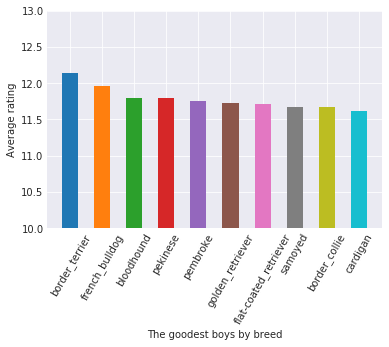

In [94]:
plot_bar(ratings_list,breed_list)

From our visualization, we have our "top-tier" goodest boy dog breed as border terriers, followed by french bulldogs, bloodhounds, pembrokes, golden retrievers, samoyeds, border collies, and cardigans.